### 2021-2 Machine Learning (01)
## Homework #2: Support Vectore Machines Step 3 - MLP
---
Copyright (c) Code Designed by Prof. Jaehyeong Sim 

Department of Computer Science and Engineering

Ewha Womans University



## Read the csv file and convert the data into Numpy array

In [ ]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import make_classification
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

data = np.recfromcsv("haberman.csv", names=None)

x = data[:,0:3]
t = data[:,3]

# TODO: your job - make appropriate inputs and ground truth outputs for the neural network from the dataset

X = np.zeros(x.T.shape)
for i in range (x.T.shape[0]):
  max = np.max(x.T[i])
  min = np.min(x.T[i])
  X[i] = (x.T[i] - min) / (max - min)

O = t-1


83
30
69
58
52
0


## Visualize the data in 3d space

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(data, columns=["Age", "Year", "PAD", "Class"])
fig = px.scatter_3d(df, x=df.Age, y=df.Year, z=df.PAD, color=df.Class, symbol=df.Class)
fig.update_traces(marker_size=2)
fig.update_traces(marker_color=1)
fig.update_coloraxes(showscale=False)
fig.update_layout(legend_itemsizing="constant")
fig.show()

## Parameter initialization function

In [ ]:
def init_params(num_input = 2, num_hidden = 2, num_output=1):
  W1 = np.random.rand(num_hidden, num_input)
  B1 = np.random.rand(num_hidden, 1)
  W2 = np.random.rand(num_output, num_hidden)
  B2 = np.random.rand(num_output, 1)
  return W1, B1, W2, B2

## wxpb and activation functions

In [ ]:
def wxpb(W, X, B):
  return np.dot(W, X) + B

def tanh(x):
  return np.tanh(x)

def sigmoid (x):
  return 1/(1+np.exp(-1*x))

## Loss function

In [ ]:
def loss_func(Z, O):
  return 1./(Z.shape[1])*np.sum(1./2 * ((Z-O)**2))

## Forward propagation

In [ ]:
def forward(X, O, W1, B1, W2, B2):
  A1 = wxpb(W1, X, B1)
  Z1 = tanh(A1)
  A2 = wxpb(W2, Z1, B2)

  Z2 = sigmoid(A2)
  loss = loss_func(Z2, O)
  return A1, Z1, A2, Z2, loss

## Backpropagation

In [ ]:
def backprop(W2, A1, Z1, A2, Z2, X, O):

  dZ2 = np.multiply(Z2-O, sigmoid(A2)*(1-sigmoid(A2)))
  dW2 = np.dot(dZ2, Z1.T)
  dB2 = np.sum(dZ2)

  dZ1 = np.multiply(np.dot(W2.T, dZ2), (1-(tanh(A1)**2)))
  dW1 = np.dot(dZ1, X.T)
  dB1 = np.sum(dZ1)
  
  return dW1, dB1, dW2, dB2

## Train function

In [ ]:
def train(W1, B1, W2, B2, X, O, lr, nepochs):

  loss_trace = []
  acc_trace = []

  for epoch in range(nepochs):

    A1, Z1, A2, Z2, loss = forward(X, O, W1, B1, W2, B2)
    dW1, dB1, dW2, dB2 = backprop(W2, A1, Z1, A2, Z2, X, O)

    W2 = W2 - lr * dW2
    B2 = B2 - lr * dB2

    W1 = W1 - lr * dW1
    B1 = B1 - lr * dB1
    
    acc_trace.append(np.sum(abs(Z2 - O) < 0.5)/X.shape[1])
    loss_trace.append(loss)

  return W1, B1, W2, B2, loss_trace, loss, acc_trace, Z1, Z2

## Initialize parameters and run training process

In [ ]:
# TODO: your job - change the neural network as below
#                  number of inputs:       3
#                  number of hidden units: 3
#                  number of outputs:      1

W1, B1, W2, B2 = init_params(3,3,1)
W1, B1, W2, B2, loss_trace, loss, acc_trace, Z1, Z2 = train(W1, B1, W2, B2, X, O, 0.001, 500)


## Visualize loss trace

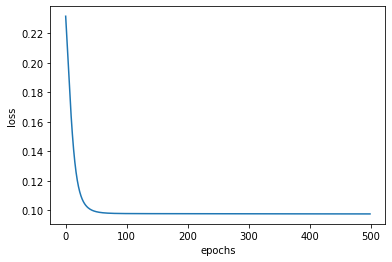

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

## Visualize accuracy trace

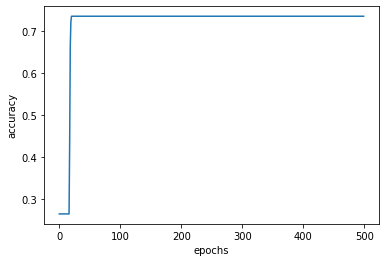

0.7352941176470589


In [ ]:
plt.plot(acc_trace)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

# TODO: your job - print out the final accuracy
print(acc_trace[-1])

### ❔ Compare the final accuracy with the accuracy result of kernel trick in Step2. 
### 🗒 Answer here: MLP result is Less accurate than using kernel tricks.